In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

path = "data\\ds_salaries.csv"

# Load the dataset
df = pd.read_csv(path)

# 1. Data Analysis and Preprocessing
def prepare_data(df):
    # Create copy to avoid modifying original data
    data = df.copy()
    
    # Convert salary_in_usd to thousands for better readability
    data['salary_in_usd'] = data['salary_in_usd'] / 1000
    
    # Label encode categorical variables
    le = LabelEncoder()
    categorical_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
    
    for col in categorical_cols:
        data[col + '_encoded'] = le.fit_transform(data[col])
    
    return data

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [3]:
# Prepare data
processed_data = prepare_data(df)

NameError: name 'prepare_data' is not defined

In [4]:
# 2. Visualization Functions
def create_visualizations(data):
    # 1. Salary Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x='salary_in_usd', bins=30)
    plt.title('Distribution of Data Science Salaries (in thousands USD)')
    plt.xlabel('Salary (thousands USD)')
    plt.ylabel('Count')
    plt.show()
    # Markup: This histogram reveals the overall salary distribution, helping us understand
    # the central tendency, spread, and potential outliers in data science compensation.
    # It's crucial for identifying salary ranges and potential skewness in the dataset.

    # 2. Salary by Experience Level
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='experience_level', y='salary_in_usd')
    plt.title('Salary Distribution by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Salary (thousands USD)')
    plt.xticks(rotation=45)
    plt.show()
    # Markup: The box plot compares salary distributions across different experience levels,
    # revealing how compensation progresses with career advancement. This visualization 
    # helps identify salary progression, median values, and outliers for each experience tier.

    # 3. Salary by Company Size
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x='company_size', y='salary_in_usd')
    plt.title('Salary Distribution by Company Size')
    plt.xlabel('Company Size')
    plt.ylabel('Salary (thousands USD)')
    plt.show()
    # Markup: The violin plot shows the nuanced salary distribution across different 
    # company sizes. Unlike a simple box plot, it reveals the full probability density,
    # highlighting how company size impacts salary structure and variability.

    # 4. Top 10 Paying Job Titles
    plt.figure(figsize=(12, 6))
    job_salary = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=job_salary.values, y=job_salary.index)
    plt.title('Top 10 Highest Paying Data Science Jobs')
    plt.xlabel('Average Salary (thousands USD)')
    plt.tight_layout()
    plt.show()
    # Markup: This bar chart identifies the highest-paying job titles in data science,
    # providing insight into career paths and potential salary expectations. It helps 
    # understand which specific roles command the highest compensation in the field.

    # 5. Salary by Work Year and Experience
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x='work_year', y='salary_in_usd', hue='experience_level', size='salary_in_usd',
                    sizes=(50, 400), alpha=0.6)
    plt.title('Salary Trends by Work Year and Experience Level')
    plt.xlabel('Work Year')
    plt.ylabel('Salary (thousands USD)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    # Markup: This scatter plot explores the intersection of time, experience, and salary.
    # By using color and size to represent experience levels and salary magnitude,
    # we can visualize how compensation evolves across different years and career stages.

In [5]:
# Create visualizations
create_visualizations(processed_data)

NameError: name 'processed_data' is not defined

In [7]:
# 3. Model Building and Evaluation
def build_model(data):
    # Prepare features and target
    feature_cols = ['work_year', 'experience_level_encoded', 'employment_type_encoded',
                   'job_title_encoded', 'employee_residence_encoded', 'company_location_encoded',
                   'company_size_encoded']
    
    X = data[feature_cols]
    y = data['salary_in_usd']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train XGBoost model
    model = xgb.XGBRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    return model, X_test, y_test, y_pred, X_train, feature_cols

In [ ]:
# Build and evaluate model
model, X_test, y_test, y_pred, X_train, feature_cols = build_model(processed_data)

In [10]:
# 4. Error Analysis
def analyze_errors(data, model, X_test, y_test, y_pred, X_train, feature_cols):
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Performance Metrics:")
    print(f"RMSE: {rmse:.2f}k")
    print(f"MAE: {mae:.2f}k")
    print(f"R2 Score: {r2:.3f}")
    
    # Create error analysis visualizations
    # 1. Predicted vs Actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Salary (thousands USD)')
    plt.ylabel('Predicted Salary (thousands USD)')
    plt.title('Predicted vs Actual Salaries')
    plt.show()
    
    # 2. Error Distribution
    errors = y_pred - y_test
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, bins=30)
    plt.title('Distribution of Prediction Errors')
    plt.xlabel('Prediction Error (thousands USD)')
    plt.ylabel('Count')
    plt.show()
    
    # 3. Feature Importance
    importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='importance', y='feature')
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    # 4. Error Analysis by Experience Level
    test_data = pd.DataFrame({
        'actual': y_test,
        'predicted': y_pred,
        'error': errors,
        'experience_level': data.loc[y_test.index, 'experience_level']
    })
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=test_data, x='experience_level', y='error')
    plt.title('Prediction Errors by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Prediction Error (thousands USD)')
    plt.xticks(rotation=45)
    plt.show()

c:\Users\markk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\markk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\markk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\markk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Model Performance Metrics:
RMSE: 50.74k
MAE: 37.86k
R2 Score: 0.348


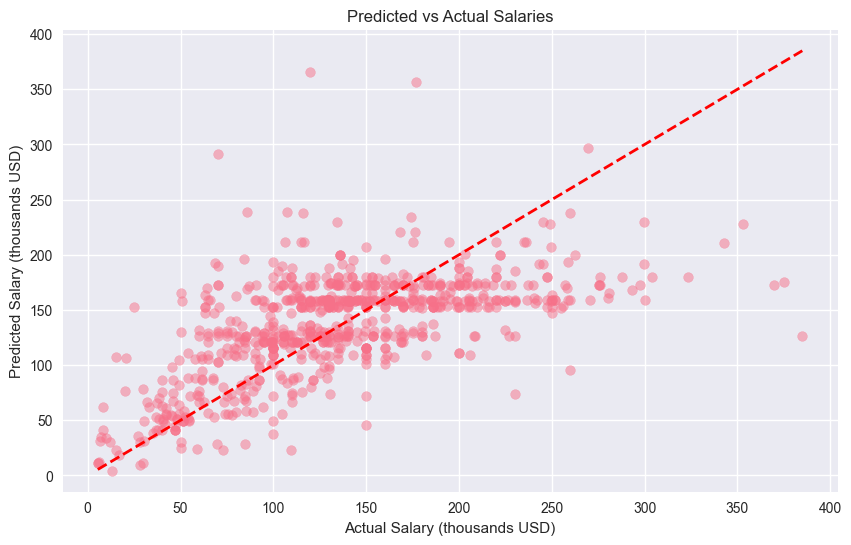

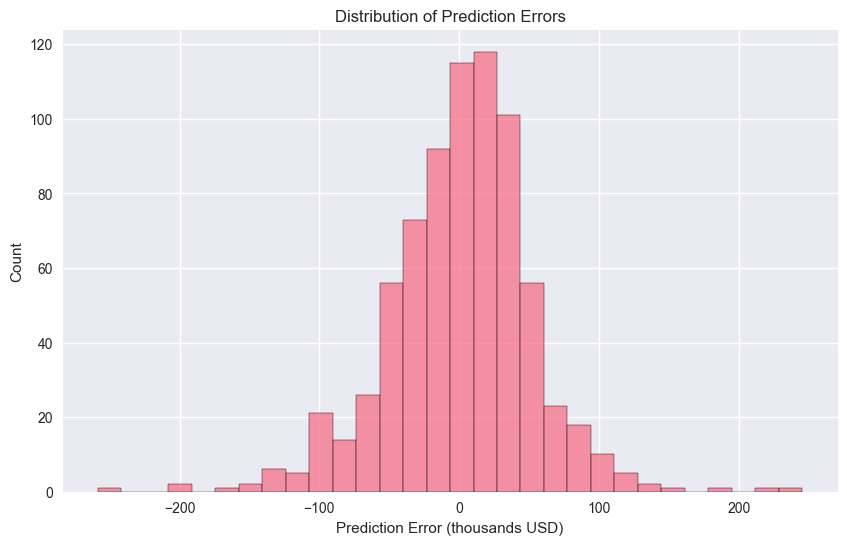

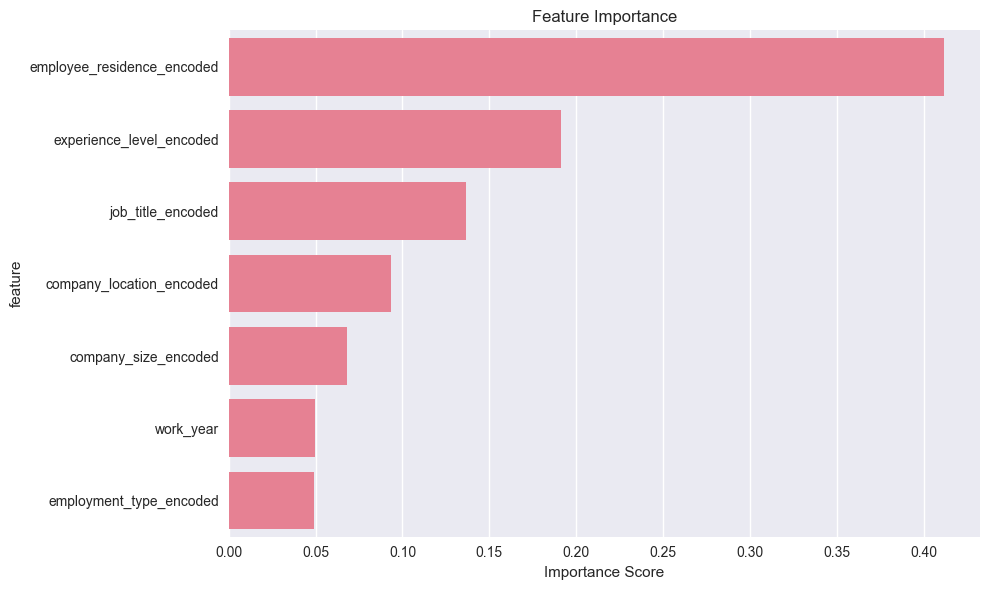

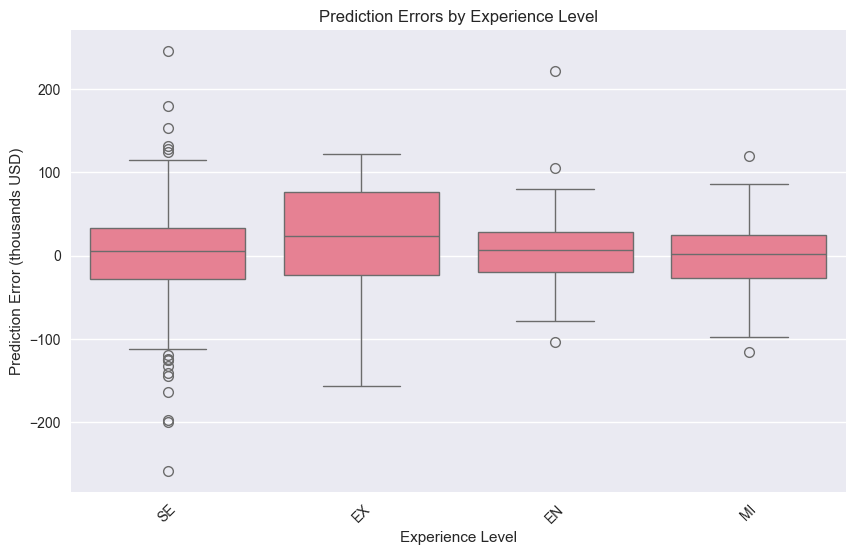

In [11]:
# Analyze errors
analyze_errors(processed_data, model, X_test, y_test, y_pred, X_train, feature_cols)